# 3.3.2 - Softmax-Regression (Praktische Umsetzung)

### 01 - Daten laden

In [1]:
from os.path import join
import numpy as np
import pandas as pd

path = '..\Data'
file = 'iris_data.csv'

df = pd.read_csv(join(path, file))
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 02 - Daten visualisieren

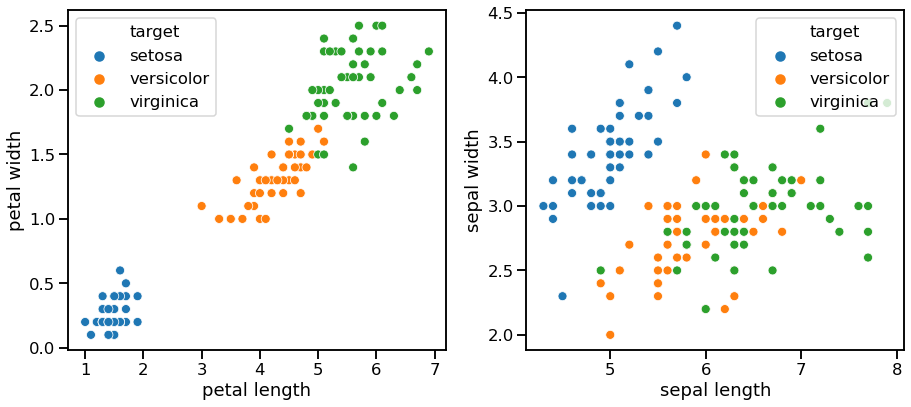

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
fig, axs = plt.subplots(nrows=1, ncols=2,
                        figsize=(13, 6))
sns.scatterplot(data=df, x='sepal length', y='sepal width', ax=axs[1], hue='target')
sns.scatterplot(data=df, x='petal length', y='petal width', ax=axs[0], hue='target')
plt.tight_layout()

### 03 - X- und y-Variablen separieren und Train- / Test-Split durchführen

In [3]:
from sklearn.model_selection import train_test_split

X = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=.2, random_state=11)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

### 04 - Softmax-Modell instanziieren und anlernen

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

# Intercept und Gewichte anzeigen
model.intercept_, model.coef_

(array([  8.69126011,   2.70006364, -11.39132376]),
 array([[-0.37862132,  0.89590462, -2.28198049, -0.97959981],
        [ 0.51507445, -0.68550227, -0.10123739, -0.87580223],
        [-0.13645313, -0.21040235,  2.38321789,  1.85540204]]))

### 05 - Beispiel-Schätzungen durchführen

In [5]:
## Drei x-Beispieldaten gleichzeitig übergeben
x_pred = [[6.4, 3.2, 4.5, 1.5],
          [6.7, 3.3, 5.7, 2.5],
          [5.8, 4.0, 1.2, 0.2]]

y_pred = model.predict(x_pred)
y_pred_proba = model.predict_proba(x_pred)

print('Geschätzte labels für Beispiel 1, 2 und 3:\n', y_pred)
print()
print('Geschätzte Probabilities für Beispiel 1, 2, und 3 (Zeilen) in der Reihenfolge:\n', model.classes_, '\n', y_pred_proba.round(3))

Geschätzte labels für Beispiel 1, 2 und 3:
 ['versicolor' 'virginica' 'setosa']

Geschätzte Probabilities für Beispiel 1, 2, und 3 (Zeilen) in der Reihenfolge:
 ['setosa' 'versicolor' 'virginica'] 
 [[0.008 0.806 0.186]
 [0.    0.016 0.984]
 [0.989 0.011 0.   ]]


### 06 - Qualität des Modells anhand der Testdaten überprüfen

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = model.predict(X_test)
matrix = confusion_matrix(y_test, y_test_pred)
acc = accuracy_score(y_test, y_test_pred)

print('Confusion matrix:\n', matrix, sep='')
print('Accuracy:', acc.round(3))

Confusion matrix:
[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
Accuracy: 0.933
